In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

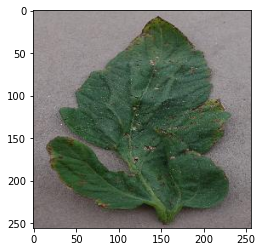

In [13]:
img = cv2.cvtColor(cv2.imread('C:\\Users\\HP\\Desktop\\tomato\\train\\Tomato___Bacterial_spot\\1.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [14]:
img.shape

(256, 256, 3)

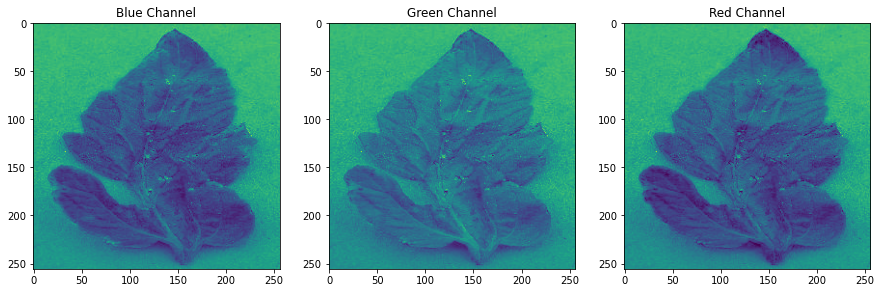

In [15]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [16]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,159,158,156,155,155,156,158,159,158,158,...,162,163,158,158,158,160,162,161,159,156
1,159,158,156,155,155,156,158,159,157,158,...,163,164,159,159,160,162,164,162,159,156
2,159,158,156,155,155,156,158,159,157,157,...,161,161,162,161,161,162,163,162,159,156
3,158,157,157,156,156,157,157,158,157,156,...,157,157,164,162,159,158,159,160,159,158
4,157,157,157,157,157,157,157,157,157,157,...,156,156,165,161,156,154,155,157,159,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,121,121,121,120,120,121,122,123,128,133,...,136,138,126,131,133,131,129,124,124,129
252,121,121,120,120,120,121,121,121,123,127,...,134,136,125,129,133,128,118,120,133,141
253,122,121,120,121,122,123,122,121,121,124,...,135,136,127,127,132,124,108,113,129,131
254,124,122,121,123,126,127,125,123,123,125,...,133,133,136,132,139,137,124,131,141,131


In [17]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [18]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [19]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(256, 50)
(256, 50)
(256, 50)


In [20]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9752138497241054
Green Channel: 0.9560005322082824
Red Channel  : 0.9733815181140418


In [21]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(256, 256) (256, 256) (256, 256)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)


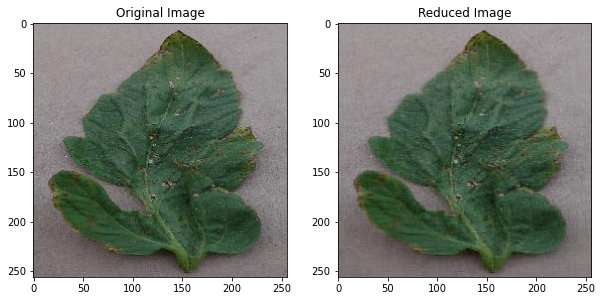

In [22]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)

In [26]:

from PIL import Image
import numpy as np
import pandas as pd

imframe = Image.open('C:\\Users\\HP\\Desktop\\tomato\\train\\Tomato___Bacterial_spot\\1.jpg')
npframe = np.array(imframe.getdata())
imgrgbdf = pd.DataFrame(npframe)
imgrgbdf

,0,1,2
0,159,153,153
1,158,152,152
2,156,150,150
3,155,149,149
4,155,149,149
...,...,...,...
65531,135,125,126
65532,129,119,120
65533,139,129,130
65534,143,133,134
